In [1]:
import pandas as pd

df = pd.read_csv('diabetes.csv')

In [2]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


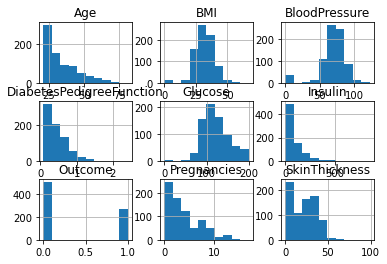

<Figure size 4320x4320 with 0 Axes>

In [3]:
from matplotlib import pyplot as plt

df.hist()
plt.figure(figsize=(60, 60))
plt.show()

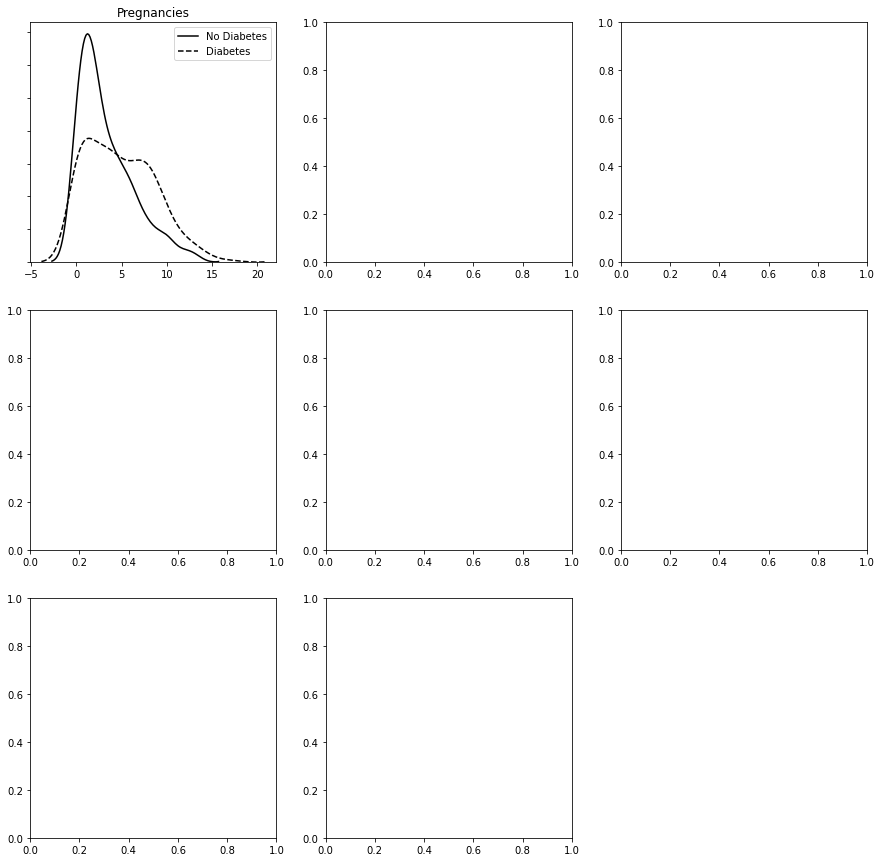

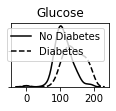

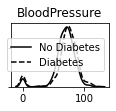

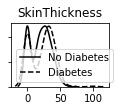

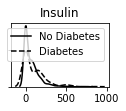

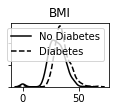

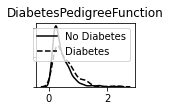

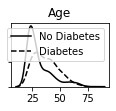

/home/ykamel/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/ykamel/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
<ipython-input-4-95b862d4a093>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3,3,9).set_visible(False)


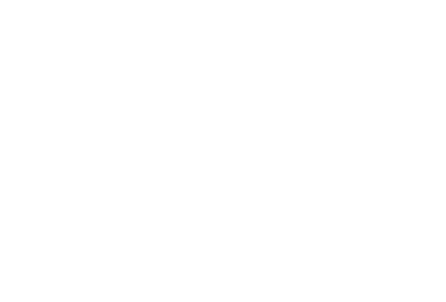

In [4]:
import seaborn as sns

plt.subplots(3, 3, figsize=(15,15))

for idx, col in enumerate (df.columns):
    ax = plt.subplot(3, 3, idx + 1)
    ax.yaxis.set_ticklabels([])
    sns.distplot(df.loc[df.Outcome == 0][col], hist=False, axlabel=False, kde_kws={'linestyle':'-', 'color':'black', 'label':"No Diabetes"})
    sns.distplot(df.loc[df.Outcome == 1][col], hist=False, axlabel=False, kde_kws={'linestyle':'--', 'color':'black', 'label':"Diabetes"})
    ax.set_title(col)

    plt.subplot(3,3,9).set_visible(False)
    plt.show()

Let's replqce the 0 values with NaN so we can use the fillna function

In [5]:
import numpy as np

df['Glucose'] = df['Glucose'].replace(0, np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
df['Insulin'] = df['Insulin'].replace(0, np.nan)
df['BMI'] = df['BMI'].replace(0, np.nan)

Now let's replace these null values with the mean of the column

In [6]:
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

In [7]:
from sklearn import preprocessing

df_scaled = preprocessing.scale(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled['Outcome'] = df['Outcome']
df = df_scaled

In [8]:
from sklearn.model_selection import train_test_split


X = df.loc[:, df.columns != 'Outcome']
y = df.loc[:, 'Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [9]:
from keras.models import Sequential

model = Sequential()

In [10]:
from keras.layers import Dense
model.add(Dense(32, activation='relu', input_dim=8))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(X_train, y_train, epochs=200)

Epoch 1/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6618 - accuracy: 0.6059
Epoch 2/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6032 - accuracy: 0.7020
Epoch 3/200
20/20 [==============================] - 0s 2ms/step - loss: 0.5591 - accuracy: 0.7117
Epoch 4/200
20/20 [==============================] - 0s 2ms/step - loss: 0.5281 - accuracy: 0.7231
Epoch 5/200
20/20 [==============================] - 0s 3ms/step - loss: 0.5050 - accuracy: 0.7329
Epoch 6/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4877 - accuracy: 0.7476
Epoch 7/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4747 - accuracy: 0.7557
Epoch 8/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4627 - accuracy: 0.7590
Epoch 9/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4539 - accuracy: 0.7704
Epoch 10/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4460 - accuracy: 0.7736
Epoch 11/

20/20 [==============================] - 0s 1ms/step - loss: 0.3364 - accuracy: 0.8388
Epoch 84/200
20/20 [==============================] - 0s 1ms/step - loss: 0.3357 - accuracy: 0.8420
Epoch 85/200
20/20 [==============================] - 0s 1ms/step - loss: 0.3338 - accuracy: 0.8371
Epoch 86/200
20/20 [==============================] - 0s 1ms/step - loss: 0.3334 - accuracy: 0.8322
Epoch 87/200
20/20 [==============================] - 0s 1ms/step - loss: 0.3333 - accuracy: 0.8436
Epoch 88/200
20/20 [==============================] - 0s 1ms/step - loss: 0.3314 - accuracy: 0.8420
Epoch 89/200
20/20 [==============================] - 0s 1ms/step - loss: 0.3298 - accuracy: 0.8485
Epoch 90/200
20/20 [==============================] - 0s 1ms/step - loss: 0.3284 - accuracy: 0.8502
Epoch 91/200
20/20 [==============================] - 0s 1ms/step - loss: 0.3272 - accuracy: 0.8453
Epoch 92/200
20/20 [==============================] - 0s 1ms/step - loss: 0.3316 - accuracy: 0.8469
Epoch 93/200


20/20 [==============================] - 0s 1ms/step - loss: 0.2520 - accuracy: 0.8941
Epoch 165/200
20/20 [==============================] - 0s 1ms/step - loss: 0.2506 - accuracy: 0.8909
Epoch 166/200
20/20 [==============================] - 0s 1ms/step - loss: 0.2500 - accuracy: 0.8958
Epoch 167/200
20/20 [==============================] - 0s 2ms/step - loss: 0.2470 - accuracy: 0.8909
Epoch 168/200
20/20 [==============================] - 0s 1ms/step - loss: 0.2463 - accuracy: 0.8925
Epoch 169/200
20/20 [==============================] - 0s 1ms/step - loss: 0.2456 - accuracy: 0.8860
Epoch 170/200
20/20 [==============================] - 0s 1ms/step - loss: 0.2448 - accuracy: 0.8958
Epoch 171/200
20/20 [==============================] - 0s 1ms/step - loss: 0.2472 - accuracy: 0.8860
Epoch 172/200
20/20 [==============================] - 0s 980us/step - loss: 0.2460 - accuracy: 0.8925
Epoch 173/200
20/20 [==============================] - 0s 1ms/step - loss: 0.2409 - accuracy: 0.8958
Ep

In [13]:
scores = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

Training Accuracy: 91.21%

Testing Accuracy: 72.08%



Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


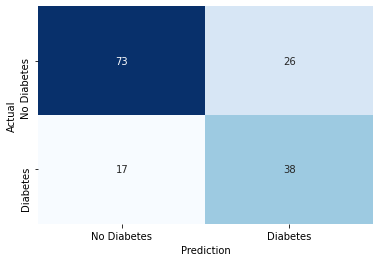

<Figure size 432x288 with 0 Axes>

In [14]:
from sklearn.metrics import confusion_matrix
y_test_pred = model.predict_classes(X_test)
c_matrix = confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(c_matrix, annot=True, xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'], cbar=False, cmap='Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()
plt.clf()

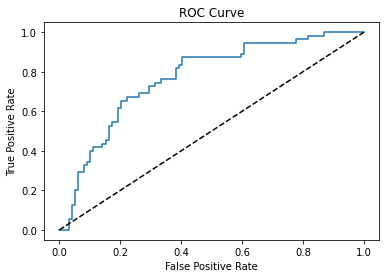

<Figure size 432x288 with 0 Axes>

In [15]:
from sklearn.metrics import roc_curve
y_test_pred_probs = model.predict(X_test)
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black') #diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
plt.clf()